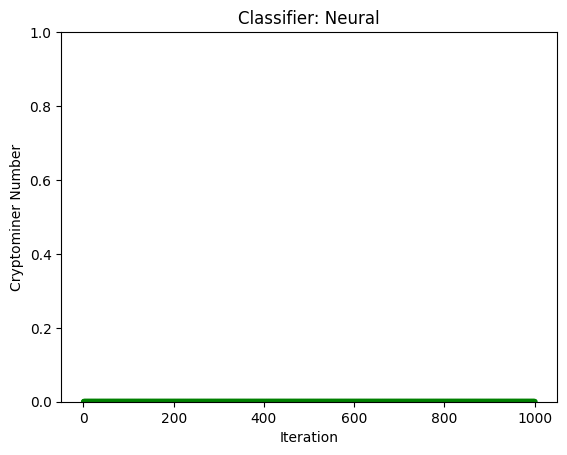

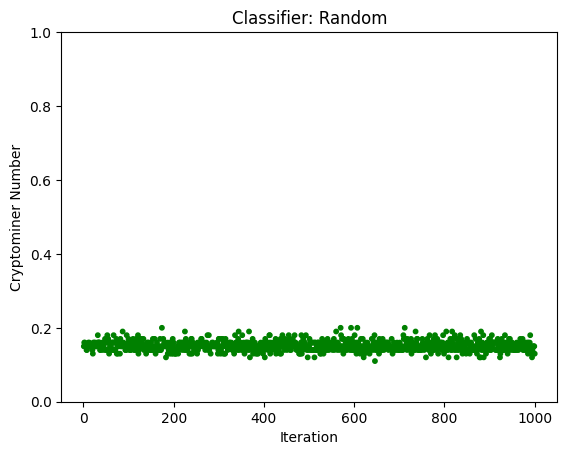

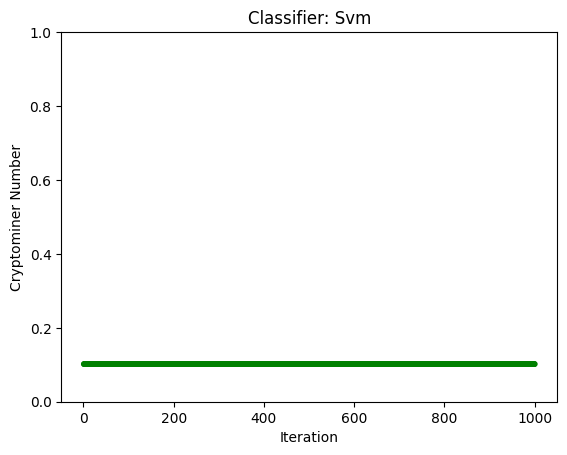

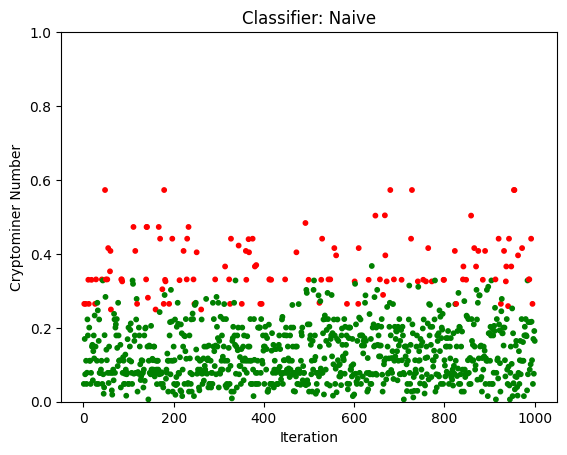

In [19]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open("data/unopt/wasm-mutate.json", "r") as file:
    data = json.load(file)

# Filter the entries with the name "needleman_wunsch"
needleman_wunsch_data = [entry for entry in data if entry["name"] == "needleman_wunsch"]

classifiers = ["neural", "random", "svm", "naive"]

for classifier in classifiers:
    # Prepare the data for the plot
    iterations = []
    cryptominer_numbers = []
    colors = []

    for entry in needleman_wunsch_data:
        iteration = entry["iteration"]
        classifier_results = entry["wasim"]["result"][classifier]
        cryptominer_number = classifier_results["Cryptominer"]

        iterations.append(iteration)
        cryptominer_numbers.append(cryptominer_number)

        # Check if the cryptominer number is the largest in the list
        max_value_key = max(classifier_results, key=lambda x: classifier_results[x] if x != "code" else -1)
        color = "red" if max_value_key == "Cryptominer" else "green"
        colors.append(color)

    # Create the plot
    plt.figure()
    plt.scatter(iterations, cryptominer_numbers, c=colors, s=10)
    plt.xlabel("Iteration")
    plt.ylabel("Cryptominer Number")
    plt.title(f"Classifier: {classifier.capitalize()}")
    plt.ylim(0, 1)

plt.show()